# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [161]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [162]:
penguins = load_penguins()
penguins = pd.DataFrame(penguins)
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [163]:
species = pd.get_dummies(penguins['species'], dtype= float, drop_first= True)
islands = pd.get_dummies(penguins['island'], dtype= float, drop_first= True)
penguins['male'] = pd.get_dummies(penguins['sex'], dtype= float, drop_first= True)
penguins = pd.concat([penguins, species], axis=1)
penguins = pd.concat([penguins, islands], axis=1)

In [164]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,male,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0,0.0,0.0,0.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1.0,0.0,0.0,0.0,1.0


In [165]:
#Model 1
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'male', 'Chinstrap', 'Gentoo', 'Dream', 'Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)
y_pred_lr_train = lr_fit.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.671211854412639
0.5973035911179057


In [166]:
#Model 2
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'flipper_length_mm', 'male', 'Chinstrap', 'Gentoo', 'Dream', 'Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)
y_pred_lr_train = lr_fit.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.6272484409136362
0.6484597892489969


In [167]:
#Model 3
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'male', 'Chinstrap', 'Gentoo', 'Dream', 'Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)
y_pred_lr_train = lr_fit.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.8063521743143031
0.6103443562214921


In [168]:
#Model 4
y = penguins['bill_depth_mm']
X = penguins[['male', 'Chinstrap', 'Gentoo', 'Dream', 'Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

y_pred_lr = lr_fit.predict(X_test)
y_pred_lr_train = lr_fit.predict(X_train)

print(mean_squared_error(y_test, y_pred_lr))
print(mean_squared_error(y_train, y_pred_lr_train))

0.6534031578112948
0.6914854860579527


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Based on the following graph, the models that use the training data perform better in terms of MSE. Overall, the average MSE was lower when using the models that predict using the training data. This makes sense since the training data was the data used to train the model. So, using this data in the prediciton stage will typically produce better results than predicting off of the test data. 

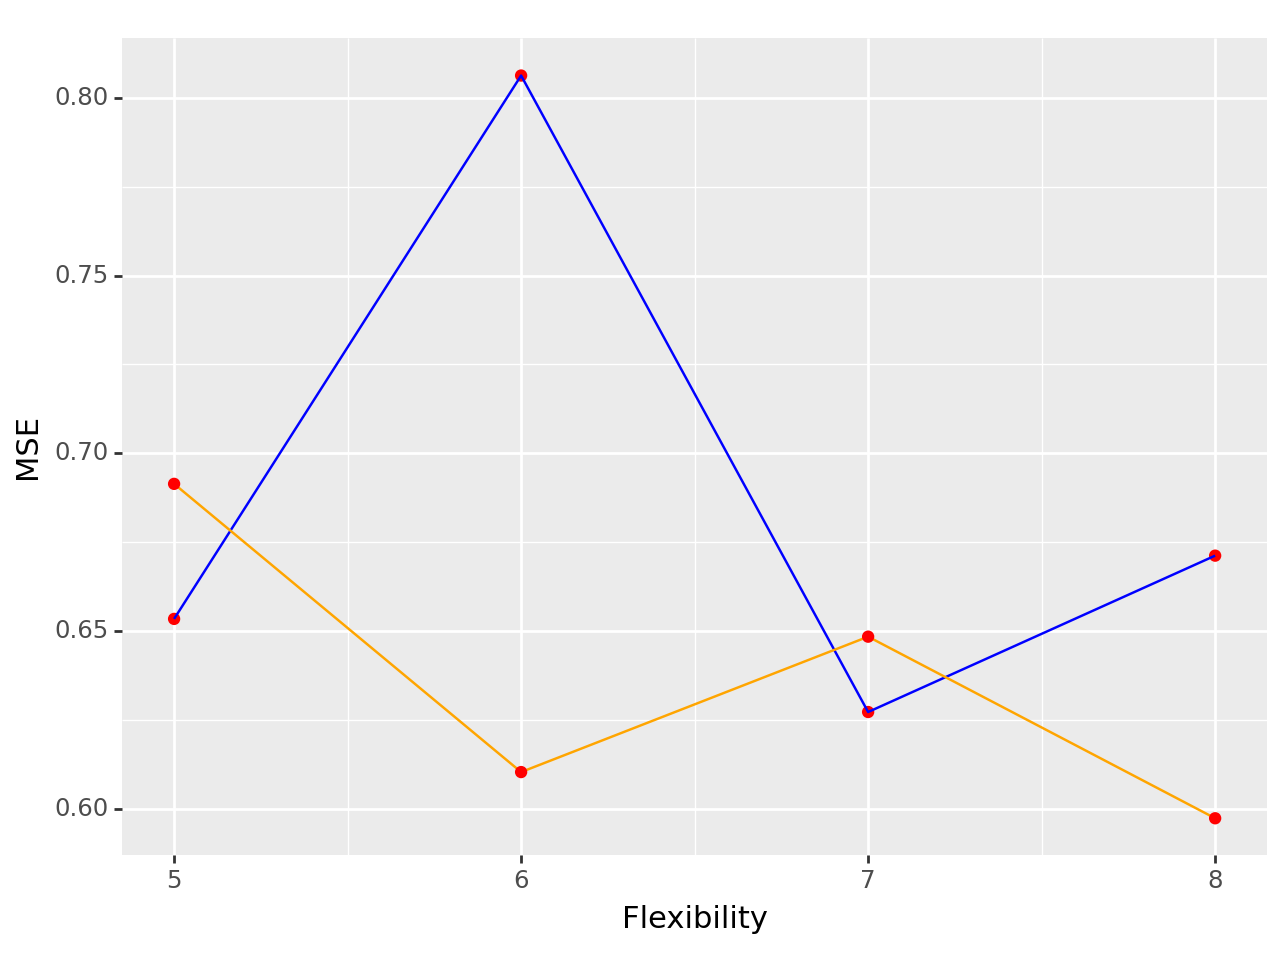

<Figure Size: (640 x 480)>

In [184]:
# Code Here

df = pd.DataFrame({
    "MSE": [0.6712, 0.6272, 0.8063, 0.6534],
    "Flexibility": [8, 7, 6, 5],
    "MSE_train": [0.5973, 0.6484, 0.6103, 0.6914],
    "Flexibility_train": [8, 7, 6, 5]
})

(ggplot(df, aes(x="Flexibility", y="MSE",))
        + geom_point(color="red")
        + geom_line(color="blue")
        + geom_line(aes(x="Flexibility_train", y="MSE_train"), color='orange')
        + geom_point(aes(x="Flexibility_train", y="MSE_train"), color="red")
        )
